# SQL Query

select cd.year,cd.avg_temp as dutch_avgtemp,gd.avg_temp as global_avgtemp
from city_data cd
join global_data gd
on cd.year=gd.year
where cd.city='Amsterdam'

# Exploratory analysis

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data
weather_df= pd.read_csv(r'C:\Users\omkar.sane\Data Analyst Nanodegree\weather_data.csv')

In [3]:
weather_df.head()

,year,dutch_avgtemp,global_avgtemp
0,1750,10.04,8.72
1,1751,9.63,7.98
2,1752,5.97,5.78
3,1753,9.08,8.39
4,1754,8.72,8.47


Text(0, 0.5, 'Temperature °C')

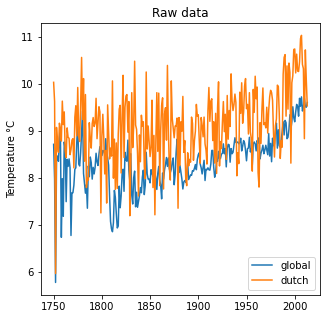

In [4]:
# Visualising the data
plt.figure(figsize=(5,5))
plt.title('Raw data')
plt.plot(weather_df.year,weather_df.global_avgtemp,label='global')
plt.plot(weather_df.year,weather_df.dutch_avgtemp,label='dutch')
plt.legend()
plt.ylabel("Temperature "+ chr(176)+"C")

Text(0, 0.5, 'Temperature °C')

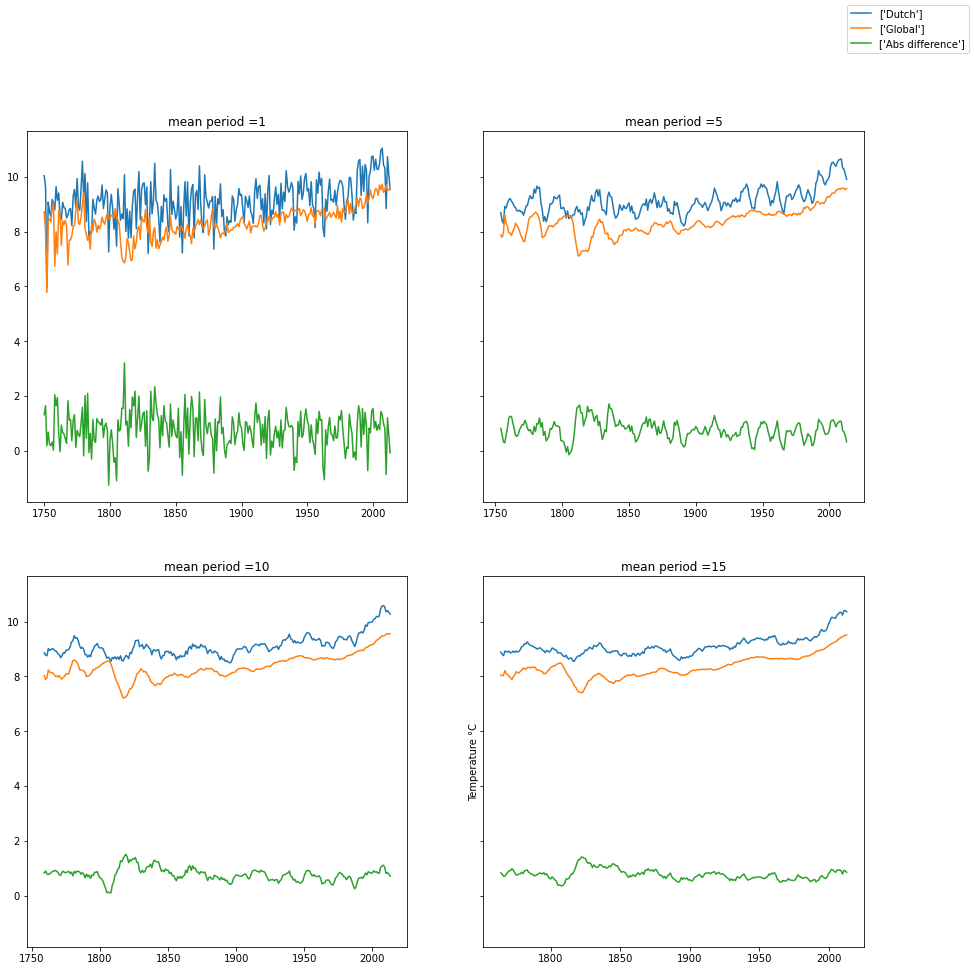

In [5]:
fig, axs = plt.subplots(2,2,figsize=(15,15),sharey=True)
marker=np.array([[1,5],[10,15]])
for i in range(2):
    for j in range(2):
        d_temp=weather_df['dutch_avgtemp'].rolling(marker[i,j]).mean()  
        g_temp=weather_df['global_avgtemp'].rolling(marker[i,j]).mean()
        axs[i,j].plot(weather_df.year,d_temp)
        axs[i,j].plot(weather_df.year,g_temp)
        axs[i,j].plot(weather_df.year,d_temp-g_temp) #difference between dutch & global temp
        axs[i,j].set_title("mean period ="+str(marker[i,j]))     
fig.legend([["Dutch"],["Global"],["Abs difference"]])
plt.ylabel("Temperature "+ chr(176)+"C")

0.7735360000000042


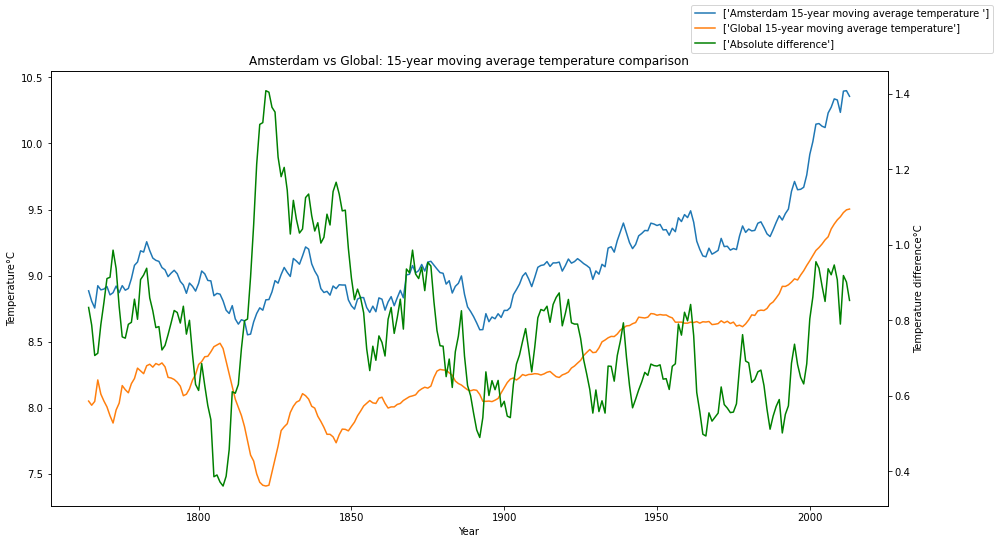

In [6]:
#Choosing 15 years moving average for further analysis
fig, ax1 = plt.subplots(figsize=(15,8))
plt.title("Amsterdam vs Global: 15-year moving average temperature comparison")
plt.xlabel('Year')
ax1.plot(weather_df.year,weather_df['dutch_avgtemp'].rolling(15).mean())
ax1.plot(weather_df.year,weather_df['global_avgtemp'].rolling(15).mean())
ax1.set_ylabel("Temperature"+ chr(176)+"C")
ax2 = ax1.twinx()
ax2.plot(weather_df.year,weather_df['dutch_avgtemp'].rolling(15).mean()-weather_df['global_avgtemp'].rolling(15).mean(),color='g')
ax2.set_ylabel("Temperature difference"+ chr(176)+"C")
fig.legend([["Amsterdam 15-year moving average temperature "],["Global 15-year moving average temperature"],["Absolute difference"]])
print((weather_df['dutch_avgtemp'].rolling(15).mean()-weather_df['global_avgtemp'].rolling(15).mean()).mean())


The inferences from the above plot are as follows :

    - The Dutch average temperature is exceeds the global average temperature 0.7 degrees with a moving window of 15 years.       
    - The temperature diffence apears to be on a downward trend 1860 onwards, which is probably due to inception of industrries.
    
    - The Global & the Dutch average temperatures have both rise by almost 10% in comparsion to pre 1800 averages.
    
    - There signals are in phase and have a periodicity of roughtly 5 years, that means the average temparatures are positively corelated.
    
    - There seems to be a dip in average temperature during the period of 1820-1830, which is more pronounced in global averages than in the NEtherlands.
    
    
    